(2234, 3456, 3)


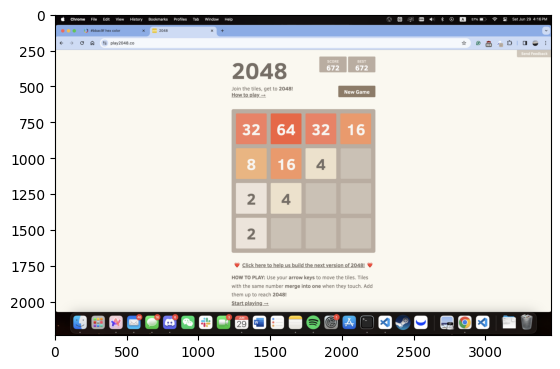

In [1]:
from PIL import Image, ImageGrab 
from matplotlib import pyplot as plt
import numpy as np
    
# image = np.asarray(ImageGrab.grab(bbox = None))[:, :, :3]
image = np.asarray(Image.open('2048.png'), dtype=np.int32)[:, :, :3]
print(image.shape)

plt.imshow(image)

In [2]:
color_dict = {
    (201, 193, 181) : 0,
    (236, 228, 219) : 2,
    (237, 223, 200) : 4,
    (243, 178, 121) : 8,
    (246, 149, 99) : 16,
    (247, 124, 95) : 32,
    (247, 95, 59) : 64,
    (237, 207, 114) : 128,
    (237, 204, 97) : 256,
    (237, 199, 80) : 512,
    (237, 196, 63) : 1024,
    (237, 194, 45) : 2048,
}
colors = color_dict.keys()
numbers = color_dict.values()
back_color = (250, 248, 239)
wall_color = (187, 172, 159)
number_color = (118, 109, 101)

In [3]:
def compare_color (a, b, delta = 7):
    return abs(a[0] - b[0]) < delta and abs(a[1] - b[1]) < delta and abs(a[2] - b[2]) < delta

[670, 1230]
[670, 1230]


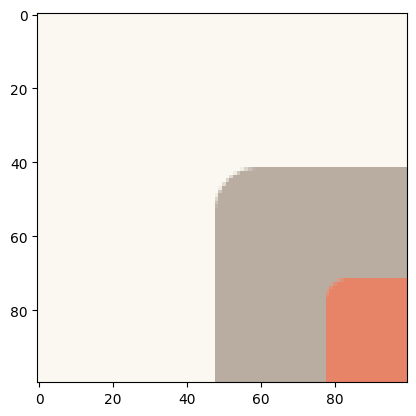

In [4]:
top_left = [50, 50]
found = False
step = 5
for j in range(0, image.shape[1] - step, step):
    for i in range(0, image.shape[0] - step, step):
        for ii in range(i, i+step):
            for jj in range(j, j+step):
                found = compare_color(image[ii, jj], wall_color)
                if (not found):
                    break
            if (not found):
                break
        if (found):
            top_left = [i, j]
            print(top_left)
            break
    if (found):
        break

print(top_left)
plt.imshow(image[top_left[0] - 50: top_left[0] + 50, top_left[1] - 50: top_left[1] + 50])

In [5]:
top_right = top_left.copy()
bottom_left = top_left.copy()

while compare_color(image[top_right[0], top_right[1]], wall_color):
    top_right[1]+=1

while compare_color(image[bottom_left[0], bottom_left[1]], wall_color):
    bottom_left[0]+=1

print('top_right ', top_right)
print('bottom_left ', bottom_left)

top_right  [670, 2227]
bottom_left  [1657, 1230]


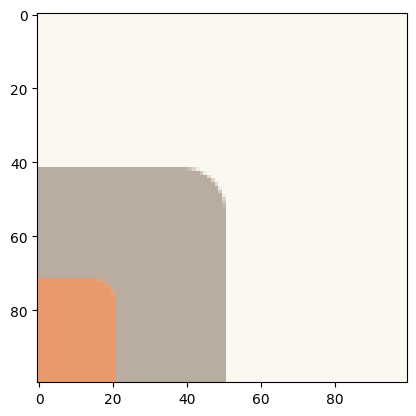

In [6]:
plt.imshow(image[top_right[0] - 50: top_right[0] + 50, top_right[1] - 50: top_right[1] + 50])

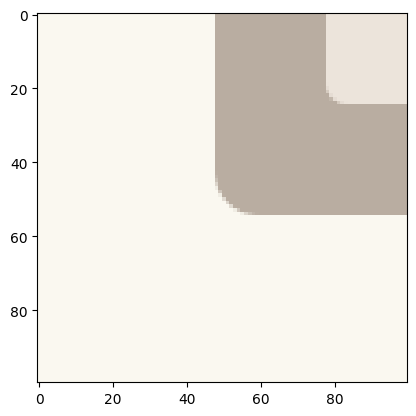

In [7]:
plt.imshow(image[bottom_left[0] - 50: bottom_left[0] + 50, bottom_left[1] - 50: bottom_left[1] + 50])

In [8]:
width = top_right[1] - top_left[1]
height = bottom_left[0] - top_left[0]
print('dimensions:', width, height)

dimensions: 997 987


(246, 149, 99)
(247, 95, 59)
(246, 149, 99)
(246, 149, 99)
(243, 178, 121)
(246, 149, 99)
(236, 228, 219)
(201, 193, 181)
(236, 228, 219)
(236, 228, 219)
(201, 193, 181)
(201, 193, 181)
(236, 228, 219)
(201, 193, 181)
(201, 193, 181)
(201, 193, 181)
[[16. 64. 16. 16.]
 [ 8. 16.  2.  0.]
 [ 2.  2.  0.  0.]
 [ 2.  0.  0.  0.]]


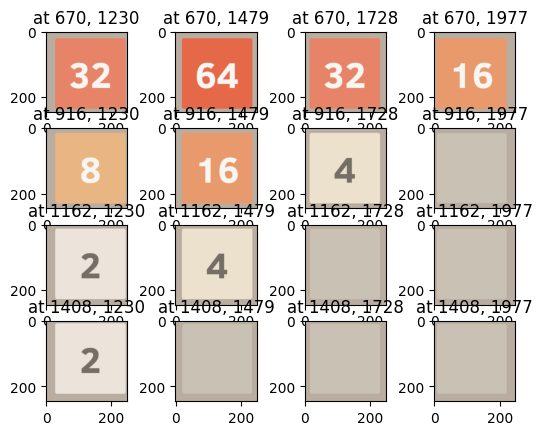

In [23]:
w_step = int(width / 4)
h_step = int(height / 4)
arr = np.zeros((4, 4))

plt.figure()

for i in range(top_left[0], bottom_left[0] - h_step, h_step):
    for j in range(top_left[1], top_right[1] - w_step, w_step):
        plt.subplot(4, 4, 1+(4 * int((i - top_left[0]) / (h_step))) +  int((j - top_left[1]) / (w_step)))
        plt.imshow(image[i:i+h_step, j:j+w_step])
        plt.title(("at " + str(i) + ", " + str(j)))

        r = image[i:i+h_step, j:j+w_step, 0]
        g = image[i:i+h_step, j:j+w_step, 1]
        b = image[i:i+h_step, j:j+w_step, 2]

        rs = sorted([(x , ((r == x).sum())) for x in np.unique(r)], key = lambda x : x[1], reverse=True)
        gs = sorted([(x , ((g == x).sum())) for x in np.unique(g)], key = lambda x : x[1], reverse=True)
        bs = sorted([(x , ((b == x).sum())) for x in np.unique(b)], key = lambda x : x[1], reverse=True)

        curr = (rs[0][0], gs[0][0], bs[0][0])

        for color in colors:
            if (compare_color(curr, color, 20)):
                print(color)
                curr = color
                break

        arr[int((i - top_left[0]) / (h_step)), int((j - top_left[1]) / (w_step))] = color_dict[curr]

print(arr)
